# Common Conversion Point Stack of a Single Station

The following notebook carries you through how to get from 
a set of receiver functions of a single station to a 3D 
common conversion point (CCP) stack. 
As an example as in the previous notebooks,
we again use IU-HRV as example station. 

---
***Note***:

It is assumed here that you have successfully computed the
receiver functions from the `00_DataCollection.ipynb`.

---

## Load the Receiver functions

So, first load the receiver function into a `RFStream`.

In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Number of loaded RFs:  815


<AxesSubplot:xlabel='Conversion Time [s]', ylabel='A    '>

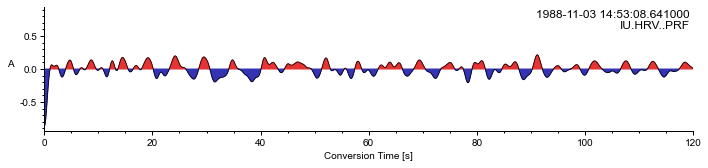

In [3]:
from pyglimer.rf.create import read_rf
from pyglimer.plot.plot_utils import set_mpl_params
set_mpl_params()

rfst = read_rf("database/waveforms/RF/P/IU/HRV/*.sac")

# Check traces
print("Number of loaded RFs: ", len(rfst))
rfst[0].plot()

## Compute Common Conversion Point Stack

This is similar to the single station stacks.


In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from pyglimer.ccp import init_ccp
import os
import numpy as np

# Define the location of the database
databaselocation = "database"
inter_bin_distance = 0.1
velocity_model = 'iasp91.dat'

ccp_init_dict = {
    "binrad": np.cos(np.radians(30)),
    "phase": 'P',
    "statloc": os.path.join(databaselocation, "stations"),
    "preproloc": os.path.join(databaselocation, "waveforms", "preprocessed"),
    "rfloc": os.path.join(databaselocation, "waveforms", "RF"),
    "network": "IU",
    "station": "HRV",
    "compute_stack": True,
    "save": 'ccp_IU_HRV.pkl'
}

# Initialize bins
ccpstack = init_ccp(inter_bin_distance, 
                    velocity_model, 
                    **ccp_init_dict)

  0%|          | 0/82 [00:00<?, ?it/s]

Number of receiver functions used: 815
Number of cores used: 12
Available system memory: 17179.869184MB


100%|██████████| 82/82 [00:50<00:00,  1.63it/s]


Stacking finished.
(2014,)


Finalizing the CCPStack

In [24]:
ccpstack.conclude_ccp()

(2014,)


### Plot bins

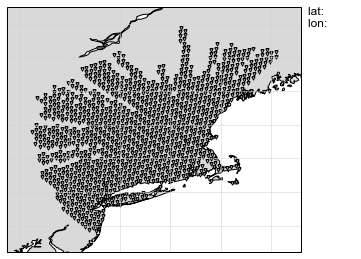

In [25]:
# Plot bins
# %matplotlib widget
import matplotlib.pyplot as plt
plt.ion()
ccpstack.plot_bins()

### Read stack from file and interpolate volume

In [26]:
import numpy as np
from pyglimer.ccp.ccp import read_ccp

ccpstack = read_ccp(filename='ccp_IU_HRV.pkl', fmt=None)

lats = np.arange(41, 43.5, 0.05)
lons = np.arange(-72.7, -69.5, 0.05)
z = np.linspace(-10, 200, 211)


### Use the `CCPStack` object to image the subsurface

Given a `CCPStack` object there are multiple ways to get images of the subsurface.

#### Compute Volume and slice using 2D images

/Users/lucassawade/OneDrive/Python/PyGLImER/src/pyglimer/plot/plot_volume.py:150: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("seismic").copy()
  self.cmap.set_bad(color=self.nancolor)


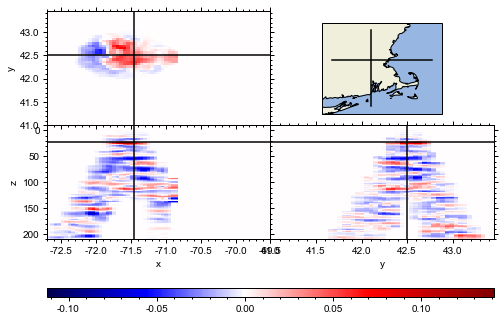

In [3]:
vplot = ccpstack.plot_volume_sections(lons, lats, zmax=211, lonsl=-71.45, latsl=42.5, zsl=23)

#### Compute Slices through the Stack using cross sections

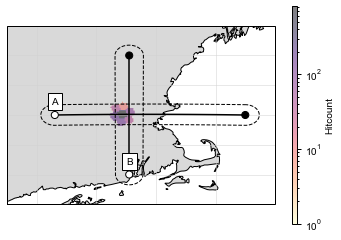

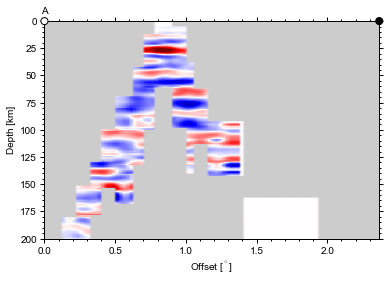

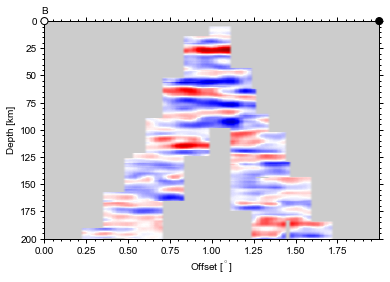

In [39]:
# Create points waypoints for the cross section
lat0 = np.array([42.5, 42.5])
lon0 = np.array([-72.7, -69.5])
lat1 = np.array([41.5, 43.5])
lon1 = np.array([-71.45, -71.45])

# Set RF boundaries
mapextent=[-73.5, -69, 41, 44]
depthextent=[0, 200]
vmin = -0.1
vmax =  0.1
 
# Plot cross sections
ax1, geoax = ccpstack.plot_cross_section(
    lat0, lon0, z0=23, vmin=vmin, vmax=vmax,
    mapplot=True, minillum=1, label="A", 
    depthextent=depthextent,
    mapextent=mapextent)
ax2, _ = ccpstack.plot_cross_section(
    lat1, lon1, vmin=vmin, vmax=vmax,
    geoax=geoax, mapplot=True,  
    minillum=1, label="B",
    depthextent=depthextent
)

## Compute a "dirty" global CCP stack

In short, we are assuming that latitudes and longitudes are cartesian entities, with a small correction for the area of each bin that depends on the change in metric width of a degree of longitude as a function of latitude.

In [1]:
from pyglimer.rf.create import read_rf
from pyglimer.plot.plot_utils import set_mpl_params
set_mpl_params()

rfst = read_rf("database/waveforms/RF/P/IU/HRV/*.sac")

Compute move-out correction and piercing points:

In [2]:
z, rfz = rfst.moveout(vmodel='iasp91.dat')

/Users/lucassawade/OneDrive/Python/PyGLImER/src/pyglimer/rf/moveout.py:521: RuntimeWarning: invalid value encountered in sqrt
  q_a = np.sqrt(vp**-2 - p**2)


Compute the CCP Volume using a 3D histogram

In [17]:
# Set extent=[minlon, maxlon, minlat, maxlat]
extent = [-72.7, -69.5, 41, 43.5]

# Compute Dirty Stack
latc, lonc, zc, ccp, illum = rfz.dirty_ccp_stack(dlon=0.075, extent=extent)

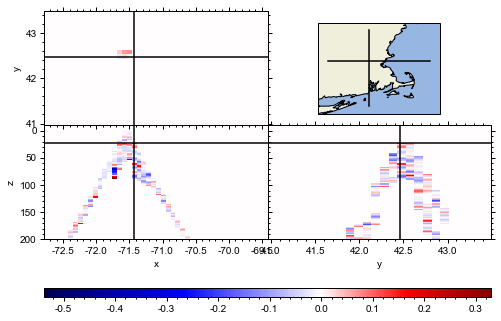

In [18]:
from pyglimer.plot.plot_volume import VolumePlot

vp = VolumePlot(lonc, latc, zc[:211], ccp[:,:,:211], xl=-71.45, yl=42.5, zl=23)

array([ -10.,   -9.,   -8.,   -7.,   -6.,   -5.,   -4.,   -3.,   -2.,
         -1.,    0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,
          8.,    9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,
         17.,   18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,
         26.,   27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,
         35.,   36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,
         44.,   45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,
         53.,   54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,
         62.,   63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,
         71.,   72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,
         80.,   81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,
         89.,   90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,
         98.,   99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,
        107.,  108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,
        116.,  117.,